# Deep Neural Networks Laboration

### **Quick introduction to Jupiter notebooks**
* Each cell in this notebook contains either code or text.
* You can run a cell by pressing Ctrl-Enter, or run and advance to the next cell with Shift-Enter.
* Code cells will print their output, including images, below the cell. Rerunning it deletes the previous output, so be careful if you want to save some results.
* You don't have to rerun all cells to test changes, just rerun the cell you have made changes to. Some exceptions might apply, for example if you overwrite variables from previous cells, but in general this will work.
* If all else fails, use the "Kernel" menu and select "Restart Kernel and Clear All Output". You can also use this menu to run all cells.
* A useful debug tool is the console. You can right-click anywhere in the notebook and select "New console for notebook". This opens a python console which shares the environment with the notebook, which let's you easily print variables or test commands.

In [1]:
# Setups
# Automatically reload modules when changed
%reload_ext autoreload
%autoreload 2

### **Your task**
Your task is to make a DNN that can classify benign or malicious networks attacks using the Mirai dataset (see below). 

**You need to answer all the questions in the notebook.** Also, for all classification tasks that you will explore, you should always answer these two questions:
- How good classification accuracy can a naive classifier obtain? The naive classifier will assume that all examples belong to one class.
- What is random chance classification accuracy if you randomly guess the label of each (test) example? For a balanced dataset and binary classification this is easy (50%), but in many cases it is more complicated and a Monte Carlo simulation may be required to estimate random chance accuracy.

If your classifier cannot perform better than a naive classifier or a random classifier, you are doing something wrong.

If the training is too slow on your own computer, use the smaller datasets (*half or *quarter).

Dense networks are not optimal for tabular datasets like the one used here, but here the main goal is to explore and get a a hands-on experience with deep learning.

# Part 1: The Dataset #

Data used in this laboration are from the [Kitsune Network Attack Datase](https://archive.ics.uci.edu/ml/datasets/Kitsune+Network+Attack+Dataset). We will focus on the 'Mirai' part of the dataset. Your task is to make a DNN that can classify if each attack is benign or malicious. The dataset has 116 covariates, but to make it a bit more difficult we will remove the first 24 covariates.

### **1.1 Load the data**
Complete and run the following cell to to load the the `Mirai_data.npy` and the `Mirai_labels.npy` files and remove the first 24 covariances to make the classification task harder.

In [13]:
import os
from numpy import genfromtxt # ! Not needed if you load data from numpy arrays !
import numpy
import numpy as np

# Load data from numpy arrays, choose reduced files if the training takes too long
# Load the dataset
X = np.load('Mirai_data.npy')
Y = np.load('Mirai_labels.npy')

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Remove the first 24 covariates (columns)
X = X[:,24:]
Y = Y

# Print the size of the covariates and labels
print(X.shape)
print(Y.shape)
# ============================================

(764137, 92)
(764137,)


### **1.2 Explore the data (NaNs)**
It is common to have NaNs (not a number) in the data, lets check for it.

In [15]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# It is common to have NaNs in the data, lets check for it. Hint: np.isnan()
nan_count_X =np.isnan(X).sum()
# Fist check for NaNs in the data and then in the labels
nan_count_Y =np.isnan(Y).sum()
# Print the number of NaNs in the covariates
print(f"Number of NaNs in X: {nan_count_X}")
print(f"Number of NaNs in Y: {nan_count_Y}")
# ============================================

Number of NaNs in X: 0
Number of NaNs in Y: 0


### **1.3 Data preprocessing: normalization**

In [17]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
import numpy as np
# Convert covariates to floats
X = X.astype(float)

# Convert labels to integers
Y = Y.astype(int)

mean = X.mean(axis=0)
std = X.std(axis=0)
# Remove mean of each covariate (column)
X = X - mean
# Divide each covariate (column) by its standard deviation
X = X/std

# Check that mean is 0 and standard deviation is 1 for all covariates, by printing mean and std
print("Mean of X after normalization: ", X.mean(axis=0))
print("Standard deviation of X after normalization: ", X.std(axis=0))
# ============================================


Mean of X after normalization:  [-3.19451533e-18 -6.30927527e-14  1.19963828e-13  4.56743018e-15
  4.08813918e-14  1.46461039e-13  5.65402045e-16 -1.69587525e-14
 -3.03376191e-13  1.25514109e-12 -2.72042402e-12 -1.10780892e-13
 -1.22468718e-13 -1.70290612e-13 -1.02139901e-14 -2.32208048e-12
  1.40695736e-12  1.20673259e-12 -1.05095447e-13  6.81889584e-14
 -1.00490973e-13  5.98862427e-14 -1.01547416e-12 -1.66283323e-12
 -1.58597771e-12 -1.31674067e-13  4.43360813e-13  8.41389037e-13
  5.77665264e-14 -4.50766872e-13 -2.54973195e-12  3.12056823e-13
 -1.53665212e-13  1.69273859e-12  9.50945604e-13  1.50953004e-13
 -1.01059397e-12 -5.11453792e-13 -1.86373908e-12 -2.09806690e-13
  1.03169903e-12 -1.47389966e-12 -1.69587525e-14 -1.64918984e-16
 -5.13325984e-14 -1.02166240e-14 -1.74685907e-15  1.34329189e-13
  5.98601714e-14  1.48745574e-17 -4.24927612e-13  5.77728088e-14
  1.25638129e-15  1.71850347e-13  1.50955720e-13  2.14478905e-14
  3.65405571e-14  1.21380412e-13 -9.10989074e-13 -6.308001

### **1.4 Data split**
Use the first 70% of the dataset for training, leave the other 30% for validation and test, call the variables:
- `Xtrain` and `Ytrain`  (70% of the dataset)
- `Xtemp` and `Ytemp`  (30% of the dataset)

We use a function from scikit learn (see the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for more details)

In [19]:
from sklearn.model_selection import train_test_split

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# split the original dataset into 70% Training and 30% Temp
Xtrain, Xtemp, Ytrain, Ytemp = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print the number of examples of each class, for the training data and the remaining 30%
train_count = np.bincount(Ytrain)
temp_count = np.bincount(Ytemp)
print("Number of examples of each class in the training set: ", train_count)
print("Number of examples of each class in the test set: ", temp_count)

# ============================================

print('Xtrain has size {}.'.format(Xtrain.shape))
print('Ytrain has size {}.'.format(Ytrain.shape))

print('Xtemp has size {}.'.format(Xtemp.shape))
print('Ytemp has size {}.'.format(Ytemp.shape))

Number of examples of each class in the training set:  [ 85248 449647]
Number of examples of each class in the test set:  [ 36373 192869]
Xtrain has size (534895, 92).
Ytrain has size (534895,).
Xtemp has size (229242, 92).
Ytemp has size (229242,).


Now split your non-training data (`Xtemp`, `Ytemp`) into 50% validation (`Xval`, `Yval`) and 50% testing (`Xtest`, `Ytest`), we use a function from scikit learn. In total this gives us 70% for training, 15% for validation, 15% for test.

In [21]:
from sklearn.model_selection import train_test_split

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# split the remaining 30% into 50% Validation and 50% Test
Xval, Xtest, Yval, Ytest = train_test_split(Xtemp, Ytemp, test_size=0.5, random_state=42)

# ============================================

print(f'The validation set has size {Xval.shape[0]}')
print(f'The test set has size {Xtest.shape[0]}')

The validation set has size 114621
The test set has size 114621


#### **<span style="color:red">Questions</span>**
1. Do all variables (`Xtrain`,`Ytrain`), (`Xval`,`Yval`), (`Xtest`,`Ytest`) have the shape that you expect?
2. Given the number of examples from each class, how high classification performance can a naive classifier obtain? The naive classifier will assume that all examples belong to one class. Note: you do not need to make a naive classifier, this is a theoretical question, just to understand how good performance we can obtain by guessing that all examples belong to one class.

Note, that if your classifier cannot perform better than a naive classifier or a random classifier, you are doing something wrong.


#### **<span style="color:green">Answer</span>**
1. Yes

2. The classifier assumes all examples belong to one class, we assume all example belong to the second class.The classification performance could be calculated by: accuracy=(samples from the second)/ (total samples). The accuracy for the test data would roughly be 84%.

In [23]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"

# This sets the GPU to allocate memory only as needed
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) != 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True) 
else:
    print('No GPU available.')

No GPU available.


# Part 2: DNN classification
In this next section you will define utilities for building the deep learning networks that will be used later and for visualizing the model training. You will also train several model experimenting with different model architecture configurations and methods for model regularization.

### **2.1 Build DNN model**
Implement the `build_DNN` and `plot_results` functions in the `utilities.py` file. Note that for the changes in the `utilities.py` definitions to be visible by the notebook, you need to save the file. 

Here are some relevant functions that you should use in `build_DNN`. For a complete list of functions and their definitions see the [keras documentation](https://keras.io/api/):

- `model.add()`, adds a layer to the network;
- `Dense()`, a dense network layer. See the [documentation](https://keras.io/api/layers/core_layers/dense/) what are the input options and outputs of the `Dense()` function. 
- `model.compile()`, compiles the model. You can set the input metrics=['accuracy'] to print the classification accuracy during the training.
- cost and loss functions: check the [documentation](https://keras.io/losses/) and chose a loss function for binary classification.

To get more information in model [compile](https://keras.io/api/models/model_training_apis/#compile-method), [training](https://keras.io/api/models/model_training_apis/#fit-method) and [evaluation](https://keras.io/api/models/model_training_apis/#evaluate-method) see the relevant documentation.

After defining the`build_DNN` function use it to create the your first DNN classifier. Start with a simple network with 2 dense layers (with 20 nodes each), using sigmoid activation functions. The final dense layer should have a single node and a sigmoid activation function. We start with the SGD optimizer.

Make sure that the last layer always has a sigmoid activation function (why?).

In [25]:
from utilities import build_DNN, plot_results, train_DNN
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# import a suitable loss function from keras.losses and use as input to the build_DNN function.
from tf_keras.losses import binary_crossentropy as BC

# Build a DNN model following the specifications above
model = build_DNN(input_shape = X.shape, n_hidden_layers = 2, n_hidden_units = 20, loss = BC, act_fun='sigmoid', optimizer='sgd')
# ============================================

### **2.2 Train DNN model**

Time to train the DNN!
Start simple with 2 hidden layers with 20 nodes each.

Build set the different hyper-parameters, build the model and run the training. Use the following training and hyper-parameters:
- `batch_size=20`
- `epochs=20`
- `learning_rate=0.1`

Make sure that you are using learning rate 0.1 !

### 2 hidden layers with 20 nodes each

In [27]:
# Setup some training and hyper-parameters
batch_size = 10000
epochs = 20

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Specify the learning rate, the input shape and the loss function
learning_rate = 0.1
input_shape = (Xtrain.shape[1], )
loss = BC
n_hidden_layers = 2
n_hidden_units = 20

# Build the model
build_DNN(input_shape = input_shape, n_hidden_layers = n_hidden_layers, n_hidden_units = n_hidden_units, 
                   loss = loss, act_fun='sigmoid', optimizer='sgd')

# Train the model, provide training data and validation data
training_config = {"Xtrain": Xtrain, 
                   "Ytrain": Ytrain, 
                   "Xval": Xval, 
                   "Yval": Yval,
                   "batch_size": batch_size,
                   "epochs": epochs}
config = {"input_shape": input_shape,
         "n_hidden_layers": n_hidden_layers,
         "n_hidden_units": n_hidden_units,
         "loss": loss,
         "act_fun": "sigmoid",
         "learning_rate": learning_rate,
         "optimizer": "sgd"}

model1 = train_DNN(config = config, training_config = training_config)
# ============================================

Epoch 1/20

54/54 - 3s - loss: 0.4641 - accuracy: 0.8270 - val_loss: 0.4254 - val_accuracy: 0.8404 - 3s/epoch - 54ms/step
Epoch 2/20


C:\Users\helen\anaconda3\Lib\site-packages\ray\train\_internal\session.py:657: UserWarning: `report` is meant to only be called inside a function that is executed by a Tuner or Trainer. Returning `None`.
  warnings.warn(


54/54 - 1s - loss: 0.4055 - accuracy: 0.8406 - val_loss: 0.3817 - val_accuracy: 0.8404 - 652ms/epoch - 12ms/step
Epoch 3/20
54/54 - 1s - loss: 0.3542 - accuracy: 0.8406 - val_loss: 0.3234 - val_accuracy: 0.8404 - 739ms/epoch - 14ms/step
Epoch 4/20
54/54 - 1s - loss: 0.2960 - accuracy: 0.8406 - val_loss: 0.2687 - val_accuracy: 0.8404 - 664ms/epoch - 12ms/step
Epoch 5/20
54/54 - 1s - loss: 0.2506 - accuracy: 0.8513 - val_loss: 0.2332 - val_accuracy: 0.8584 - 703ms/epoch - 13ms/step
Epoch 6/20
54/54 - 1s - loss: 0.2240 - accuracy: 0.8723 - val_loss: 0.2139 - val_accuracy: 0.8826 - 896ms/epoch - 17ms/step
Epoch 7/20
54/54 - 1s - loss: 0.2094 - accuracy: 0.8917 - val_loss: 0.2029 - val_accuracy: 0.8968 - 589ms/epoch - 11ms/step
Epoch 8/20
54/54 - 1s - loss: 0.2009 - accuracy: 0.8975 - val_loss: 0.1962 - val_accuracy: 0.9024 - 583ms/epoch - 11ms/step
Epoch 9/20
54/54 - 1s - loss: 0.1953 - accuracy: 0.9010 - val_loss: 0.1915 - val_accuracy: 0.9029 - 587ms/epoch - 11ms/step
Epoch 10/20
54/54 -

In [29]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Evaluate the model on the test data
score = model1["history"].model.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 11s 3ms/step - loss: 0.1728 - accuracy: 0.9084
Test loss: 0.1728
Test accuracy: 0.9084


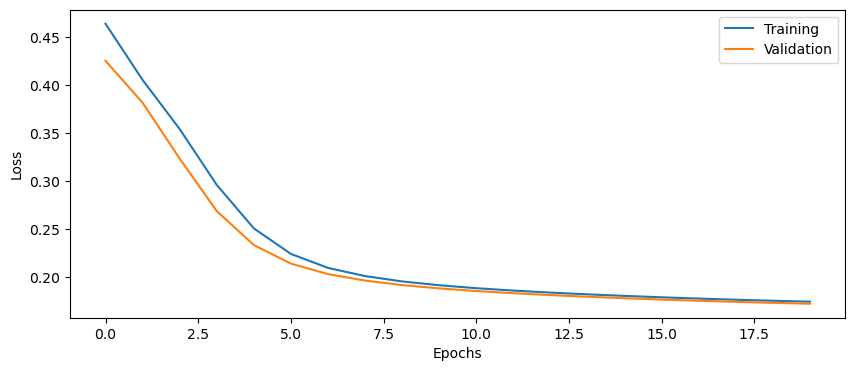

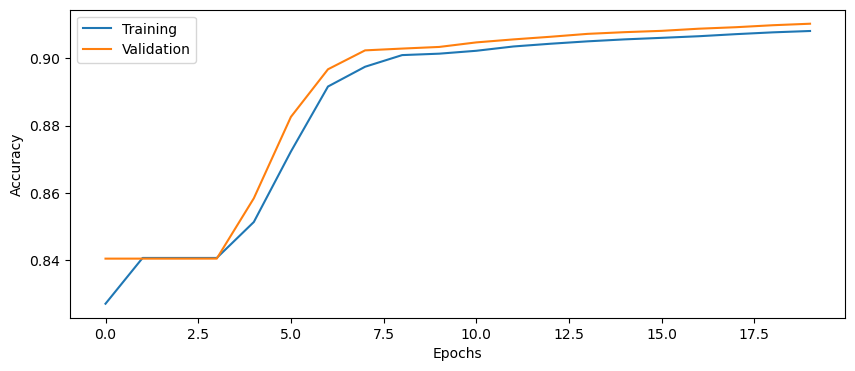

In [30]:
from utilities import plot_results

# Plot the history from the training run
plot_results(model1["history"])

#### **<span style="color:red">Questions</span>**

3. What happens if you add several Dense layers without specifying the activation function?

4. How are the weights in each dense layer initialized as default? How are the bias weights initialized?

#### **<span style="color:green">Answers</span>**

3. If no activation function is specified in a Sense layer, it only uses a linear activation function by default. Each dense layer will only perform a linear transformation on its  input and no matter how many such layers we stack, the final output can only be reduced to a single equivalent dense layer.

4. The weights in a dense layer are randomly initialized using the Xavier uniform initialization. The bias in a dense layer is initialized to 0 by default.

### **2.2 Adressing class imbalance**

This dataset is rather unbalanced with the majority of the samples belonging to class=1. We need to define class weights so that the training pays more attention to the class with fewer samples. We use the [`compute_class_weight`](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html) function from `scikit-learn`.

You need to call the function something like this
```python
class_weights = class_weight.compute_class_weight(class_weight = , classes = , y = )
```

otherwise it will through an error.

In [33]:
from sklearn.utils import class_weight

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Calculate class weights
class_weights = class_weight.compute_class_weight(class_weight ="balanced" , classes =np.unique(Ytrain) , y = Ytrain)
value1, value2 = class_weights

# Print the class weights
print(value1, value2)

# ============================================

# Convert class weights into a dictionary that can be used as input to the model.fit() function

class_weights = {0: value1,
                1: value2}


3.1372876783033035 0.5947943609097803


### Train a model using class weights. 2 hidden layers with 20 nodes each


In [120]:
## Setup some training and hyper-parameters
batch_size = 10000
epochs = 20

# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Specify the learning rate, the input shape and the loss function
learning_rate = 0.1
input_shape = (Xtrain.shape[1], )
loss = BC
n_hidden_layers = 2
n_hidden_units = 20

# Build the model
model2 = build_DNN(input_shape = input_shape, n_hidden_layers = n_hidden_layers, n_hidden_units = n_hidden_units, 
                   loss = loss, act_fun='sigmoid', optimizer='sgd')

# Train the model, provide training data and validation data
training_config2 = {"Xtrain": Xtrain, 
                   "Ytrain": Ytrain, 
                   "Xval": Xval, 
                   "Yval": Yval,
                   "batch_size": batch_size,
                   "epochs": epochs}
config2 = {"input_shape": input_shape,
         "n_hidden_layers": n_hidden_layers,
         "n_hidden_units": n_hidden_units,
         "loss": loss,
         "act_fun": "sigmoid",
         "learning_rate": learning_rate,
         "optimizer": "sgd"}

history2 = train_DNN(config = config2, training_config = training_config2)
# ============================================

Epoch 1/20
54/54 - 2s - loss: 0.4494 - accuracy: 0.8280 - val_loss: 0.4382 - val_accuracy: 0.8404 - 2s/epoch - 37ms/step
Epoch 2/20
54/54 - 1s - loss: 0.4378 - accuracy: 0.8406 - val_loss: 0.4380 - val_accuracy: 0.8404 - 743ms/epoch - 14ms/step
Epoch 3/20
54/54 - 1s - loss: 0.4376 - accuracy: 0.8406 - val_loss: 0.4378 - val_accuracy: 0.8404 - 727ms/epoch - 13ms/step
Epoch 4/20
54/54 - 1s - loss: 0.4374 - accuracy: 0.8406 - val_loss: 0.4376 - val_accuracy: 0.8404 - 703ms/epoch - 13ms/step
Epoch 5/20
54/54 - 1s - loss: 0.4372 - accuracy: 0.8406 - val_loss: 0.4374 - val_accuracy: 0.8404 - 668ms/epoch - 12ms/step
Epoch 6/20
54/54 - 1s - loss: 0.4369 - accuracy: 0.8406 - val_loss: 0.4371 - val_accuracy: 0.8404 - 669ms/epoch - 12ms/step
Epoch 7/20
54/54 - 1s - loss: 0.4366 - accuracy: 0.8406 - val_loss: 0.4368 - val_accuracy: 0.8404 - 688ms/epoch - 13ms/step
Epoch 8/20
54/54 - 1s - loss: 0.4363 - accuracy: 0.8406 - val_loss: 0.4365 - val_accuracy: 0.8404 - 680ms/epoch - 13ms/step
Epoch 9/20


In [100]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------
# Evaluate model on test data
score = history2["history"].model.evaluate(Xtest, Ytest)

# ============================================
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

3582/3582 [==============================] - 7s 2ms/step - loss: 0.1723 - accuracy: 0.9052
Test loss: 0.1723
Test accuracy: 0.9052


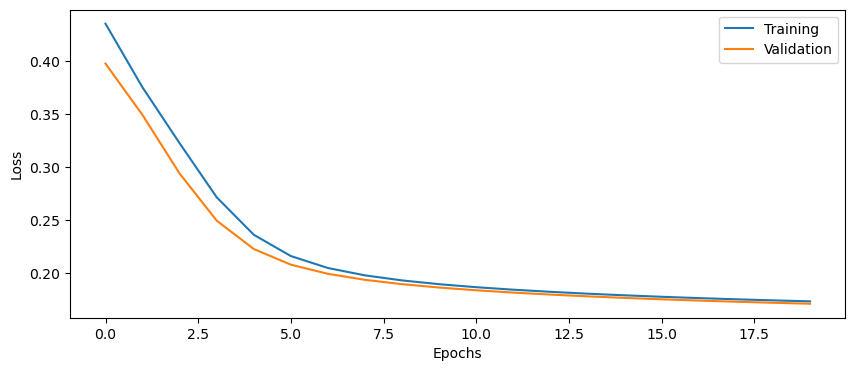

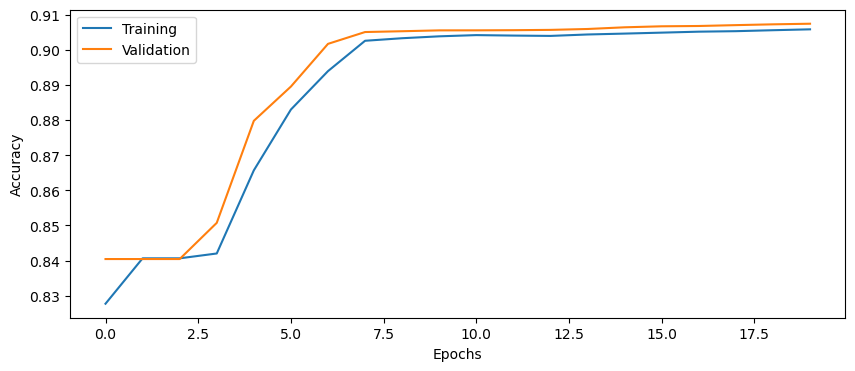

In [101]:
plot_results(history2["history"])

In [124]:
model2.summary()

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_151 (Dense)           (None, 40)                3720      
                                                                 
 activation_106 (Activation  (None, 40)                0         
 )                                                               
                                                                 
 dense_152 (Dense)           (None, 40)                1640      
                                                                 
 activation_107 (Activation  (None, 40)                0         
 )                                                               
                                                                 
 dense_153 (Dense)           (None, 40)                1640      
                                                                 
 activation_108 (Activation  (None, 40)              

### **Additional questions**
#### **<span style="color:red">Questions</span>**

5. Why do we have to use a batch size? Why can't we simply use all data at once? This is more relevant for even larger datasets.

6. What is the processing time for one training epoch when the batch size is 100? What is the processing time for one epoch when the batch size is 1,000? What is the processing time for one epoch when the batch size is 10,000? Explain the results. 

7. How many times are the weights in the DNN updated in each training epoch if the batch size is 100? How many times are the weights in the DNN updated in each training epoch if the batch size is 1,000? How many times are the weights in the DNN updated in each training epoch if the batch size is 10,000?  

8. What limits how large the batch size can be?

9.  Generally speaking, how is the learning rate related to the batch size? If the batch size is decreased, how should the learning rate be changed?
10. How many trainable parameters does the network with 4 dense layers with 50 nodes each have, compared to the initial network with 2 layers and 20 nodes per layer? Hint: use model.summary()
   
#### **<span style="color:green">Answers</span>**

5. Efficiency: Using a batch size helps significantly speed up training process and update parameters quicker, especially when we have a large dataset.

    Memory Management: Handling large datasets could be challenging due to memory constraints. Using batches allows you to fit the data into memory.

6. When the batch size is small, the number of batches increases, requiring more frequent weight updates per epoch. As a result, the overall training time is longer.
   - Batch size of 100: 12s.
   - Batch size of 1,000: 3s.
   - Batch size of 10,000: 2s.

7. With a training set of 534895 samples, the number of weight updates depends on the batch size:

   - Batch size of 100: The weights are updated 5,349 times.
   - Batch size of 1,000: The weights are updated 535 times.
   - Batch size of 10,000: The weights are updated 54 times.

8. (1) Closely related to the amount of memory on the graphics card or CPU RAM. If the batch size is too large the trading may crash, if the batch size is too small the graphics card is not working 100%

   (2)Related to learning rate. If the learning rate is large, it may need a larger learning rate.

9. The batch size and the learning rate are closely related. A low batch size, might need a smaller learning rate, as the gradient is more uncertain.

10. - 2 layers and 20 nodes: 2301 trainable parameters.
    - 4 layers and 40 nodes: 8681 trainable parameters.


### **2.3 Model regularization**

In the following sections you will explore methods for model normalization, namely `BatchNormalization` and `Dropout`, and also look at the impact of ofter activation functions and optimization algorithms.
#### **2.3.1 Batch normalization**

Now add batch normalization after each hidden dense layer in `build_DNN`.

See the [documentation](https://keras.io/layers/normalization/) for information about how to call the function.

#### **<span style="color:red">Questions</span>**
11. Why is batch normalization important when training deep networks?

#### **<span style="color:green">Answers</span>**

11. By normalizing activations in each batch, it stabilizes and accelerates training, improves performance, and helps prevent overfitting.

### 2 hidden layers, 20 nodes each, class weights and batch normalization

Epoch 1/20
54/54 - 4s - loss: 0.4345 - accuracy: 0.8092 - val_loss: 0.4253 - val_accuracy: 0.8714 - 4s/epoch - 71ms/step
Epoch 2/20
54/54 - 1s - loss: 0.2768 - accuracy: 0.8929 - val_loss: 0.3113 - val_accuracy: 0.8832 - 1s/epoch - 26ms/step
Epoch 3/20
54/54 - 1s - loss: 0.2346 - accuracy: 0.8961 - val_loss: 0.2532 - val_accuracy: 0.9045 - 1s/epoch - 26ms/step
Epoch 4/20
54/54 - 2s - loss: 0.2158 - accuracy: 0.8986 - val_loss: 0.2215 - val_accuracy: 0.9127 - 2s/epoch - 31ms/step
Epoch 5/20
54/54 - 1s - loss: 0.2054 - accuracy: 0.9009 - val_loss: 0.2074 - val_accuracy: 0.9125 - 1s/epoch - 24ms/step
Epoch 6/20
54/54 - 1s - loss: 0.1988 - accuracy: 0.9028 - val_loss: 0.2050 - val_accuracy: 0.9096 - 1s/epoch - 26ms/step
Epoch 7/20
54/54 - 1s - loss: 0.1943 - accuracy: 0.9055 - val_loss: 0.2094 - val_accuracy: 0.9094 - 1s/epoch - 25ms/step
Epoch 8/20
54/54 - 1s - loss: 0.1911 - accuracy: 0.9073 - val_loss: 0.2132 - val_accuracy: 0.9098 - 1s/epoch - 24ms/step
Epoch 9/20
54/54 - 1s - loss: 0.

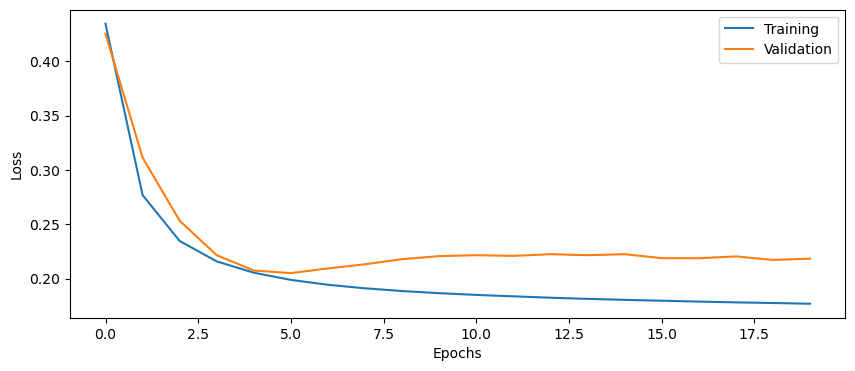

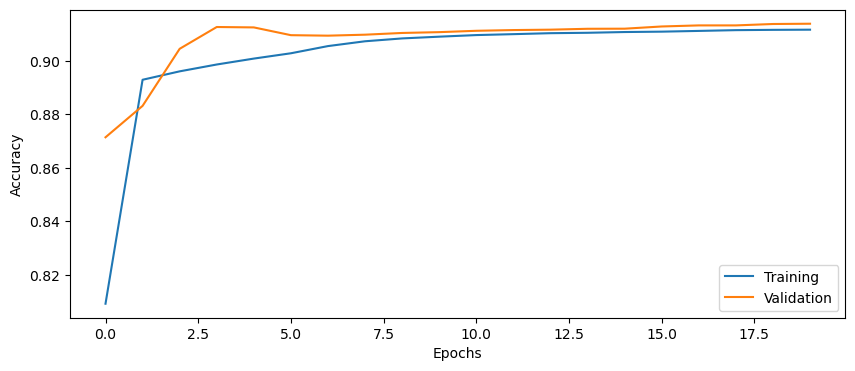

In [39]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

learning_rate = 0.1
input_shape = (Xtrain.shape[1], )
loss = BC
n_hidden_layers = 2
n_hidden_units = 20
batch_size = 10000
epochs = 20

# Build and train model
model6 = build_DNN(input_shape = input_shape, n_hidden_layers = n_hidden_layers, n_hidden_units = n_hidden_units, 
                   loss = loss, act_fun='sigmoid', optimizer='sgd', use_bn=True)

training_config6 = {"Xtrain": Xtrain, 
                   "Ytrain": Ytrain, 
                   "Xval": Xval, 
                   "Yval": Yval,
                   "batch_size": batch_size,
                   "epochs": epochs,
                   "class_weight": class_weights}
config6 = {"input_shape": input_shape,
         "n_hidden_layers": n_hidden_layers,
         "n_hidden_units": n_hidden_units,
         "loss": loss,
         "act_fun": "sigmoid",
         "learning_rate": learning_rate,
         "optimizer": "sgd",
          "use_bn": True}

model6 = train_DNN(config = config6, training_config = training_config6)

# Evaluate model on test data
score = model6["history"].model.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(model6["history"])

#### **2.3.2 Activation function**

Try changing the activation function in each layer from sigmoid to [ReLU](https://keras.io/api/layers/activations/).

**Note**: the last layer should still have a sigmoid activation function.

### 2 hidden layers, 20 nodes each, class weights, ReLU and no batch normalization

Epoch 1/20
54/54 - 3s - loss: 0.2909 - accuracy: 0.8835 - val_loss: 0.2616 - val_accuracy: 0.8893 - 3s/epoch - 49ms/step
Epoch 2/20
54/54 - 1s - loss: 0.2021 - accuracy: 0.8912 - val_loss: 0.2412 - val_accuracy: 0.8965 - 591ms/epoch - 11ms/step
Epoch 3/20
54/54 - 1s - loss: 0.1912 - accuracy: 0.8992 - val_loss: 0.2338 - val_accuracy: 0.9040 - 610ms/epoch - 11ms/step
Epoch 4/20
54/54 - 1s - loss: 0.1844 - accuracy: 0.9050 - val_loss: 0.2255 - val_accuracy: 0.9084 - 606ms/epoch - 11ms/step
Epoch 5/20
54/54 - 1s - loss: 0.1797 - accuracy: 0.9077 - val_loss: 0.2265 - val_accuracy: 0.9095 - 643ms/epoch - 12ms/step
Epoch 6/20
54/54 - 1s - loss: 0.1765 - accuracy: 0.9092 - val_loss: 0.2195 - val_accuracy: 0.9113 - 616ms/epoch - 11ms/step
Epoch 7/20
54/54 - 1s - loss: 0.1742 - accuracy: 0.9104 - val_loss: 0.2157 - val_accuracy: 0.9126 - 617ms/epoch - 11ms/step
Epoch 8/20
54/54 - 1s - loss: 0.1724 - accuracy: 0.9115 - val_loss: 0.2134 - val_accuracy: 0.9143 - 678ms/epoch - 13ms/step
Epoch 9/20


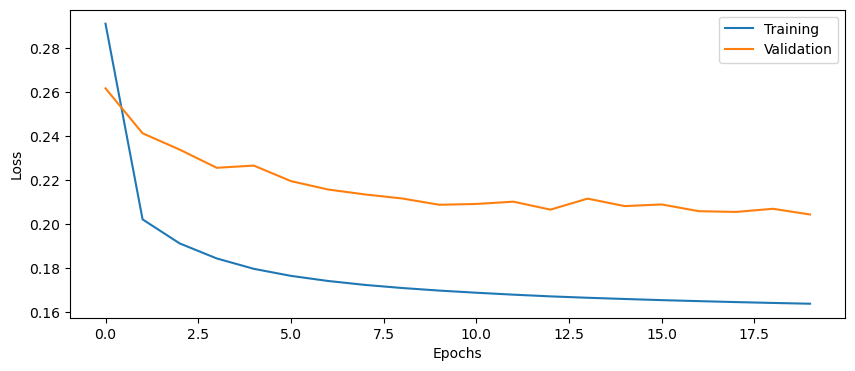

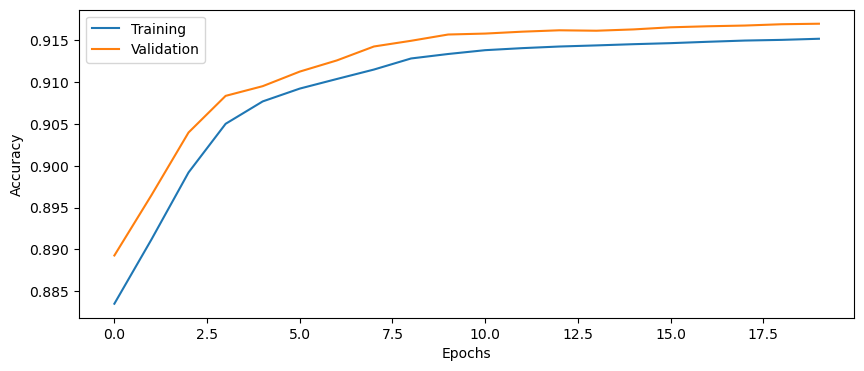

In [42]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

learning_rate = 0.1
input_shape = (Xtrain.shape[1], )
loss = BC
n_hidden_layers = 2
n_hidden_units = 20
batch_size = 10000
epochs = 20

# Build and train model
model7 = build_DNN(input_shape = input_shape, n_hidden_layers = n_hidden_layers, n_hidden_units = n_hidden_units, 
                   loss = loss, act_fun='relu', optimizer='sgd')

training_config7 = {"Xtrain": Xtrain, 
                   "Ytrain": Ytrain, 
                   "Xval": Xval, 
                   "Yval": Yval,
                   "batch_size": batch_size,
                   "epochs": epochs,
                   "class_weight": class_weights}

config7 = {"input_shape": input_shape,
         "n_hidden_layers": n_hidden_layers,
         "n_hidden_units": n_hidden_units,
         "loss": loss,
         "act_fun": "relu",
         "learning_rate": learning_rate,
         "optimizer": "sgd"}

model7 = train_DNN(config = config7, training_config = training_config7)

# Evaluate model on test data
score = model7["history"].model.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(model7["history"])

#### **2.3.3 Optimizer**

Try changing the optimizer from SGD to Adam (with learning rate 0.1 as before). Remember to import the Adam optimizer from [keras.optimizers](https://keras.io/optimizers/). 

### 2 hidden layers, 20 nodes each, class weights, Adam optimizer, no batch normalization, sigmoid activations

Epoch 1/20
54/54 - 3s - loss: 0.2359 - accuracy: 0.8734 - val_loss: 0.2376 - val_accuracy: 0.9032 - 3s/epoch - 55ms/step
Epoch 2/20
54/54 - 1s - loss: 0.1766 - accuracy: 0.9097 - val_loss: 0.2161 - val_accuracy: 0.9164 - 748ms/epoch - 14ms/step
Epoch 3/20
54/54 - 1s - loss: 0.1671 - accuracy: 0.9163 - val_loss: 0.2086 - val_accuracy: 0.9189 - 805ms/epoch - 15ms/step
Epoch 4/20
54/54 - 1s - loss: 0.1639 - accuracy: 0.9177 - val_loss: 0.1922 - val_accuracy: 0.9200 - 742ms/epoch - 14ms/step
Epoch 5/20
54/54 - 1s - loss: 0.1619 - accuracy: 0.9185 - val_loss: 0.1913 - val_accuracy: 0.9205 - 737ms/epoch - 14ms/step
Epoch 6/20
54/54 - 1s - loss: 0.1596 - accuracy: 0.9197 - val_loss: 0.1796 - val_accuracy: 0.9223 - 682ms/epoch - 13ms/step
Epoch 7/20
54/54 - 1s - loss: 0.1577 - accuracy: 0.9202 - val_loss: 0.2062 - val_accuracy: 0.9217 - 830ms/epoch - 15ms/step
Epoch 8/20
54/54 - 1s - loss: 0.1570 - accuracy: 0.9204 - val_loss: 0.1919 - val_accuracy: 0.9225 - 638ms/epoch - 12ms/step
Epoch 9/20


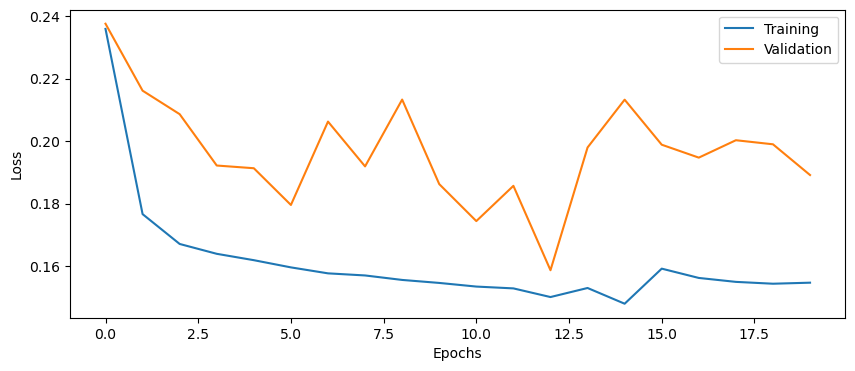

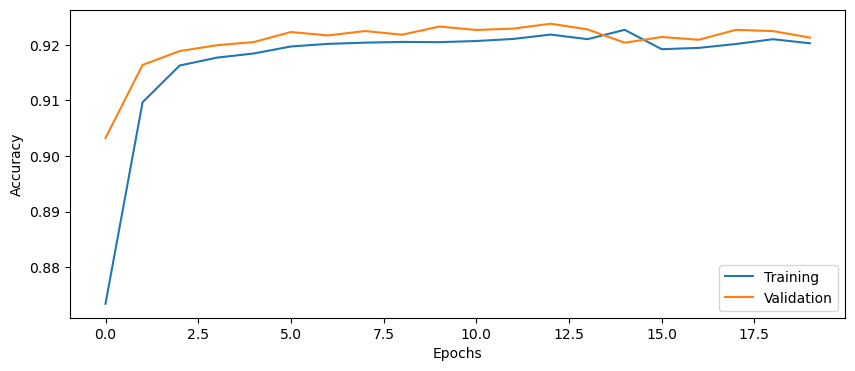

In [45]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

learning_rate = 0.1
input_shape = (Xtrain.shape[1], )
loss = BC
n_hidden_layers = 2
n_hidden_units = 20
batch_size = 10000
epochs = 20

# Build and train model
model8 = build_DNN(input_shape = input_shape, n_hidden_layers = n_hidden_layers, n_hidden_units = n_hidden_units, 
                   loss = loss, act_fun='sigmoid', optimizer='adam')

training_config8 = {"Xtrain": Xtrain, 
                   "Ytrain": Ytrain, 
                   "Xval": Xval, 
                   "Yval": Yval,
                   "batch_size": batch_size,
                   "epochs": epochs,
                   "class_weight": class_weights}

config8 = {"input_shape": input_shape,
         "n_hidden_layers": n_hidden_layers,
         "n_hidden_units": n_hidden_units,
         "loss": loss,
         "act_fun": "sigmoid",
         "learning_rate": learning_rate,
         "optimizer": "adam"}

model8 = train_DNN(config = config8, training_config = training_config8)

# Evaluate model on test data
score = model8["history"].model.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(model8["history"])

#### 2.3.4 **Dropout regularization**

Dropout is a type of regularization that can improve accuracy for validation and test data. It randomly removes connections to force the neural network to not rely too much on a small number of weights.

Add a Dropout layer after each Dense layer (but not after the final dense layer) in `build_DNN`, with a dropout probability of 50%. Look at the [documentation](https://keras.io/api/layers/regularization_layers/dropout/) for more information on how to call set this layer.

#### **<span style="color:red">Questions</span>**
12. How does the validation accuracy change when adding dropout?
13. How does the test accuracy change when adding dropout?

#### **<span style="color:green">Answers</span>**

12. The validation accuracy remains stable, which means the model is not overfitting but also not improving much beyond the initial accuracy.

13. Since it helps prevent overfitting, models trained with dropout often perform better on unseen test data. In this case, the test accuracy (88.27%) is almost the same as validation accuracy (88.43%), meaning the model generalizes well.

### 2 hidden layers with 20 nodes each, class weights, dropout, SGD optimizer, no batch normalization and sigmoid activations

Epoch 1/20
54/54 - 2s - loss: 0.7388 - accuracy: 0.4401 - val_loss: 0.6751 - val_accuracy: 0.8696 - 2s/epoch - 41ms/step
Epoch 2/20
54/54 - 1s - loss: 0.6803 - accuracy: 0.5634 - val_loss: 0.6349 - val_accuracy: 0.8804 - 789ms/epoch - 15ms/step
Epoch 3/20
54/54 - 1s - loss: 0.6437 - accuracy: 0.6276 - val_loss: 0.5801 - val_accuracy: 0.8797 - 777ms/epoch - 14ms/step
Epoch 4/20
54/54 - 1s - loss: 0.5908 - accuracy: 0.6870 - val_loss: 0.4987 - val_accuracy: 0.8815 - 779ms/epoch - 14ms/step
Epoch 5/20
54/54 - 1s - loss: 0.5213 - accuracy: 0.7408 - val_loss: 0.4100 - val_accuracy: 0.8815 - 769ms/epoch - 14ms/step
Epoch 6/20
54/54 - 1s - loss: 0.4540 - accuracy: 0.7819 - val_loss: 0.3412 - val_accuracy: 0.8814 - 767ms/epoch - 14ms/step
Epoch 7/20
54/54 - 1s - loss: 0.4020 - accuracy: 0.8115 - val_loss: 0.3022 - val_accuracy: 0.8816 - 763ms/epoch - 14ms/step
Epoch 8/20
54/54 - 1s - loss: 0.3664 - accuracy: 0.8302 - val_loss: 0.2845 - val_accuracy: 0.8816 - 848ms/epoch - 16ms/step
Epoch 9/20


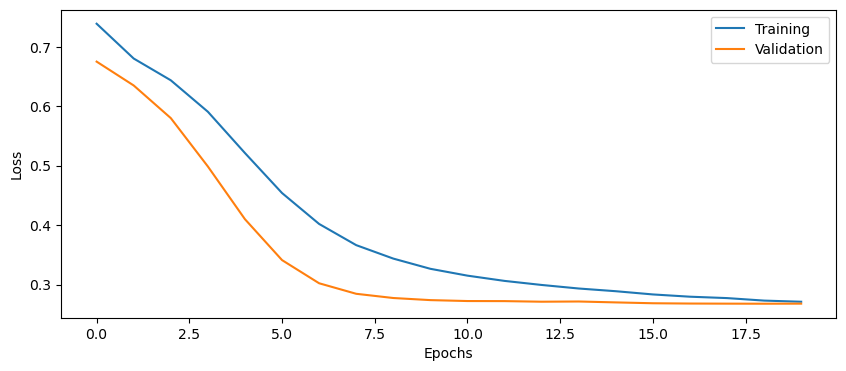

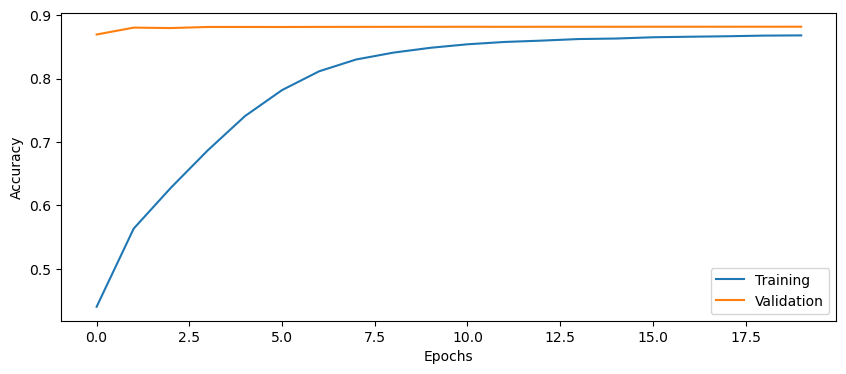

In [46]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

learning_rate = 0.1
input_shape = (Xtrain.shape[1], )
loss = BC
n_hidden_layers = 2
n_hidden_units = 20
batch_size = 10000
epochs = 20

# Build and train model
model9 = build_DNN(input_shape = input_shape, n_hidden_layers = n_hidden_layers, n_hidden_units = n_hidden_units, 
                   loss = loss, act_fun='sigmoid', optimizer='sgd', use_dropout=True)

training_config9 = {"Xtrain": Xtrain, 
                   "Ytrain": Ytrain, 
                   "Xval": Xval, 
                   "Yval": Yval,
                   "batch_size": batch_size,
                   "epochs": epochs,
                   "class_weight": class_weights}

config9 = {"input_shape": input_shape,
         "n_hidden_layers": n_hidden_layers,
         "n_hidden_units": n_hidden_units,
         "loss": loss,
         "act_fun": "sigmoid",
         "learning_rate": learning_rate,
         "optimizer": "sgd",
         "use_dropout": True}

model9 = train_DNN(config = config9, training_config = training_config9)

# Evaluate model on test data
score = model9["history"].model.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Plot the history from the training run
plot_results(model9["history"])

# Part 3:  Hyper parameter tuning

### **3.1 Manual hyper parameter tuning**
Spend some time (20 to 30 minutes) tuning the network architecture (number of layers, number of nodes per layer, activation function) and other hyper parameters (optimizer, learning rate, batch size, number of epochs, degree of regularization). For example, try a much deeper network. How much does the training time increase for a network with 10 layers?

#### **<span style="color:red">Question</span>**
14. How high classification accuracy can you achieve for the test data? What is your best configuration?
   
#### **<span style="color:green">Answers</span>**

14. - Model test accuracy: 0.9386
    
    - Configuration: 2 hidden layers, 30 nodes each, class weights, Adam optimizer, no batch normalization, no dropout, sigmoid activations

In [47]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Build and train model

learning_rate = 0.01
input_shape = (Xtrain.shape[1], )
loss = BC
n_hidden_layers = 2
n_hidden_units = 30
batch_size = 2000
epochs = 20

best_model = build_DNN(input_shape = input_shape, n_hidden_layers = n_hidden_layers, n_hidden_units = n_hidden_units, 
                   loss = loss, act_fun='sigmoid', optimizer='adam', use_bn = False, use_dropout = False)

training_config_best = {"Xtrain": Xtrain, 
                   "Ytrain": Ytrain, 
                   "Xval": Xval, 
                   "Yval": Yval,
                   "batch_size": batch_size,
                   "epochs": epochs,
                   "class_weight": class_weights}

config_best = {"input_shape": input_shape,
         "n_hidden_layers": n_hidden_layers,
         "n_hidden_units": n_hidden_units,
         "loss": loss,
         "act_fun": "sigmoid",
         "learning_rate": learning_rate,
         "optimizer": "adam",
         "use_bn": False,
         "use_dropout": False}

best_model = train_DNN(config = config_best, training_config = training_config_best)

Epoch 1/20
268/268 - 4s - loss: 0.1932 - accuracy: 0.9054 - val_loss: 0.1976 - val_accuracy: 0.9178 - 4s/epoch - 14ms/step
Epoch 2/20
268/268 - 2s - loss: 0.1605 - accuracy: 0.9172 - val_loss: 0.1931 - val_accuracy: 0.9194 - 2s/epoch - 7ms/step
Epoch 3/20
268/268 - 2s - loss: 0.1553 - accuracy: 0.9180 - val_loss: 0.1804 - val_accuracy: 0.9210 - 2s/epoch - 8ms/step
Epoch 4/20
268/268 - 2s - loss: 0.1505 - accuracy: 0.9191 - val_loss: 0.1872 - val_accuracy: 0.9207 - 2s/epoch - 7ms/step
Epoch 5/20
268/268 - 2s - loss: 0.1460 - accuracy: 0.9213 - val_loss: 0.1824 - val_accuracy: 0.9239 - 2s/epoch - 7ms/step
Epoch 6/20
268/268 - 2s - loss: 0.1404 - accuracy: 0.9249 - val_loss: 0.1658 - val_accuracy: 0.9293 - 2s/epoch - 7ms/step
Epoch 7/20
268/268 - 2s - loss: 0.1372 - accuracy: 0.9280 - val_loss: 0.1732 - val_accuracy: 0.9299 - 2s/epoch - 7ms/step
Epoch 8/20
268/268 - 2s - loss: 0.1338 - accuracy: 0.9302 - val_loss: 0.1631 - val_accuracy: 0.9320 - 2s/epoch - 7ms/step
Epoch 9/20
268/268 - 2s

3582/3582 [==============================] - 11s 3ms/step - loss: 0.1551 - accuracy: 0.9353
Test loss: 0.1551
Test accuracy: 0.9353


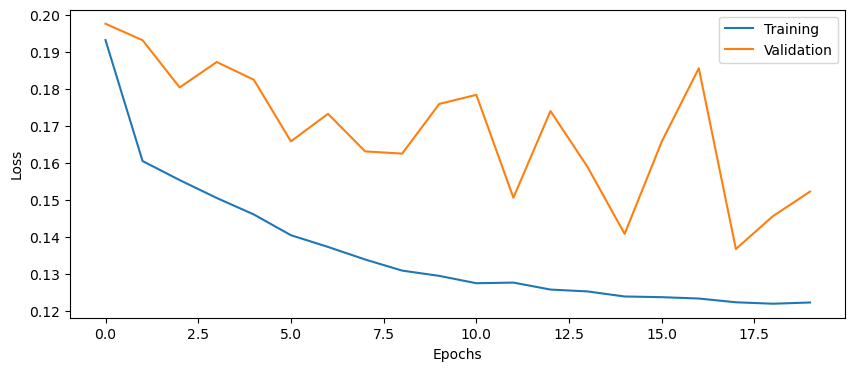

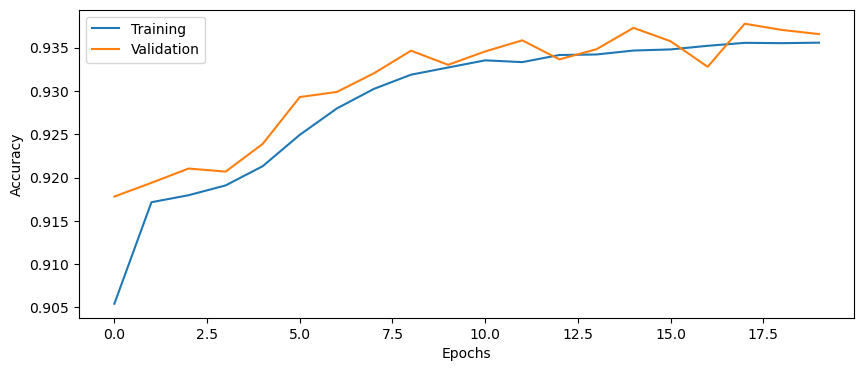

In [48]:
# Evaluate model on test data
best_score = best_model["history"].model.evaluate(Xtest, Ytest)

# ============================================

print('Test loss: %.4f' % best_score[0])
print('Test accuracy: %.4f' % best_score[1])

# Plot the history from the training run
plot_results(best_model["history"])

### **3.2 Automatic hyper parameter search**
The number of hyper parameters that can be tried manually is limited and the process of trying out the different combinations and keeping track of them is time consuming and tedious. Today, there are several libraries available for automatic hyper parameter tuning (see an extensive list [here](https://github.com/balavenkatesh3322/hyperparameter_tuning)). The library that we will use in this lab is `Ray Tune` which can be integrated with many of the deep learning APIs available today (for the full description of the library capabilities see the [documentation](https://docs.ray.io/en/latest/tune/index.html)).


To use the `Ray Tune` functionality we need a function that defines the model training. This will then be used in a wrapper function that defines the hyper parameter search space, the resources available for running the search and the search algorithm. 

Start by implementing the `train_DNN` function in the `utilities.py` file (more detailed instructions are available in `utilities.py`). In the cell below, you can set up the search space and a `tune` ray object that takes the `train_DNN`. The tuner will set `train_DNN`, will select a set of hyper parameters and train several models for us (more information [here](https://docs.ray.io/en/latest/tune/key-concepts.html?_gl=1*j3ryje*_up*MQ..*_ga*NzQyMjIzNzg4LjE3MzY0MTk5MzY.*_ga_0LCWHW1N3S*MTczNjQxOTkzNS4xLjAuMTczNjQxOTkzNS4wLjAuMA..#tune-60-seconds)). 


`Ray Tune` library provides several types of hyper parameter search algorithms, including random and grid search, and Bayesian optimization. In this lab we will be using the default Ray Tune opitmization algorithm which is random serach. More infromation about the available search arlgorithms can be found [here](https://docs.ray.io/en/latest/tune/api/suggestion.html).

#### **<span style="color:red">Question</span>**
15. Run the automatic hyper parameter search with range of possible hyper parameter values as in your manual search. Does the automatic search set of parameters match those that you have found?
16. What are the benefits and drawbacks of automatic hyper parameter search?
   
#### **<span style="color:green">Answers</span>**

15. The results from the automatic search are slightly different from the ones we chose ourselves, a hidden layer was added and the activation function has been changed to ReLu.
    
16. - Benefits: improved the performance of the model, saves  time, support parallel computing, works well for complex models
    - Drawbacks: risk of overfitting, high computational cost, may not work well for small datasets


In [53]:
# import train_DNN
from utilities import train_DNN

# imports for hyperparameter tuning
from ray import tune, train
from ray.tune.schedulers import AsyncHyperBandScheduler
import ray

# --------------------------------------------  
# === Your code here =========================
# --------------------------------------------


# Define the hyper parameter, both those that should be searched and those that are fixed.
#  Hyperparameters to search are: act_fun, optimizer, use_bn, n_hidden_layers and n_hidden_units.
# The remaining parameters can be set to fixed values (This is to reduce the search space and time).
# Add the batch size and epochs so that the train_DNN can access them.
hyperparameter_space =  {
            "act_fun": tune.choice(["relu", "sigmoid"]),
            "optimizer": tune.choice(["adam", "sgd"]),
            "use_bn": tune.choice([True, False]),
            "n_hidden_layers": tune.choice([1, 2, 3]),
            "n_hidden_units": tune.choice([20, 30, 40]),
            # here define the fixed parameters
            "loss": BC, 
            "learning_rate": 0.01,
            "use_dropout": False,
            "use_custom_dropout": False,
            "use_variational_layer": False,
            "input_shape": (Xtrain.shape[1], ),
        }

# specify batch and number of epochs
training_config = {"Xtrain": Xtrain, 
            "Ytrain": Ytrain, 
            "Xval": Xval, 
            "Yval": Yval,
            "epochs": 20,
            "batch_size": 2000
        }

# specify the number of samples to take from the hyper parameter space and run. The larger the number, the longer the search time.
# Start small (e.g. 2) to test your implementation, then increase.
num_samples = 3

# ============================================


# Definition of the Scheduler. This allows for several models to be trained/stopped/re-started simultaneously 
sched = AsyncHyperBandScheduler(
    metric="mean_accuracy", mode="max",
        time_attr="training_iteration", max_t=400, grace_period=20
    )

# Setting up the tuner.
tuner = tune.Tuner(
        tune.with_resources(tune.with_parameters(train_DNN, training_config=training_config), resources={"cpu": 4}), # definition of which training function to use and the available resources. Consider adding "gpu":0 to resources if available.
        tune_config=tune.TuneConfig(
            
            #scheduler=sched,
            num_samples=num_samples,
            trial_dirname_creator=lambda t: t.trial_id,
            
        ),
        run_config=train.RunConfig(
            #name="DNN_hp_tuning",
            verbose=0,
            #local_dir="C:/ray_results",
            log_to_file=False ,
            storage_path="C:/ray_results" # where to save the summary of the hyper parameter tuning.
        ),
        param_space=hyperparameter_space,
    )

# Run the hyper parameter search.
results = tuner.fit()

(pid=16656) 2025-03-02 18:46:42.419908: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
(pid=16656) WARNING:tensorflow:From C:\Users\helen\anaconda3\Lib\site-packages\tf_keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.
(pid=16656) 
(pid=25016) 2025-03-02 18:46:46.048723: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`. [repeated 3x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.

(train_DNN pid=16656) Epoch 1/20


(train_DNN pid=16656) WARNING:tensorflow:From C:\Users\helen\anaconda3\Lib\site-packages\tf_keras\src\utils\tf_utils.py:492: The name tf.ragged.RaggedTensorValue is deprecated. Please use tf.compat.v1.ragged.RaggedTensorValue instead.
(train_DNN pid=16656) 
(pid=25016) WARNING:tensorflow:From C:\Users\helen\anaconda3\Lib\site-packages\tensorflow_probability\python\internal\backend\numpy\_utils.py:48: The name tf.control_flow_v2_enabled is deprecated. Please use tf.compat.v1.control_flow_v2_enabled instead.
(train_DNN pid=25016) 


(train_DNN pid=16656) 268/268 - 6s - loss: 0.1601 - accuracy: 0.9143 - val_loss: 0.1427 - val_accuracy: 0.9230 - 6s/epoch - 23ms/step
(train_DNN pid=16656) Epoch 2/20 [repeated 2x across cluster]
(train_DNN pid=16656) 268/268 - 2s - loss: 0.1405 - accuracy: 0.9233 - val_loss: 0.1320 - val_accuracy: 0.9291 - 2s/epoch - 9ms/step
(train_DNN pid=25016) 268/268 - 3s - loss: 0.2593 - accuracy: 0.8775 - val_loss: 0.2352 - val_accuracy: 0.8882 - 3s/epoch - 12ms/step [repeated 3x across cluster]
(train_DNN pid=25016) Epoch 3/20 [repeated 4x across cluster]
(train_DNN pid=25016) 268/268 - 3s - loss: 0.1995 - accuracy: 0.9000 - val_loss: 0.1944 - val_accuracy: 0.9014 - 3s/epoch - 11ms/step [repeated 4x across cluster]
(train_DNN pid=25016) Epoch 5/20 [repeated 4x across cluster]
(train_DNN pid=16656) 268/268 - 3s - loss: 0.1141 - accuracy: 0.9379 - val_loss: 0.1221 - val_accuracy: 0.9344 - 3s/epoch - 10ms/step [repeated 4x across cluster]
(train_DNN pid=16656) Epoch 9/20 [repeated 4x across clust

(pid=5444) 2025-03-02 18:48:42.437641: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
(train_DNN pid=25016) 2025-03-02 18:47:32.136373: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
(train_DNN pid=25016) To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
(train_DNN pid=25016) WARNING:tensorflow:From C:\Users\helen\anaconda3\Lib\site-packages\tf_keras\src\backend.py:873: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.
(train_DNN pid=25016) WARNING:tensorflow:From C:\Users\helen\anaconda3\Lib\site-packages\tf_keras\src\utils\tf_utils.py:492: 

(train_DNN pid=5444) Epoch 1/20


(train_DNN pid=5444) WARNING:tensorflow:From C:\Users\helen\anaconda3\Lib\site-packages\tf_keras\src\utils\tf_utils.py:492: The name tf.ragged.RaggedTensorValue is deprecated. Please use tf.compat.v1.ragged.RaggedTensorValue instead.
(train_DNN pid=5444) 


(train_DNN pid=5444) 268/268 - 6s - loss: 0.3416 - accuracy: 0.8790 - val_loss: 0.2486 - val_accuracy: 0.8916 - 6s/epoch - 22ms/step
(train_DNN pid=5444) Epoch 2/20
(train_DNN pid=5444) 268/268 - 3s - loss: 0.2179 - accuracy: 0.8980 - val_loss: 0.2013 - val_accuracy: 0.9095 - 3s/epoch - 10ms/step
(train_DNN pid=5444) Epoch 3/20
(train_DNN pid=5444) 268/268 - 3s - loss: 0.1944 - accuracy: 0.9061 - val_loss: 0.1861 - val_accuracy: 0.9119 - 3s/epoch - 11ms/step
(train_DNN pid=5444) Epoch 4/20
(train_DNN pid=5444) 268/268 - 3s - loss: 0.1839 - accuracy: 0.9082 - val_loss: 0.1783 - val_accuracy: 0.9125 - 3s/epoch - 12ms/step
(train_DNN pid=5444) Epoch 5/20
(train_DNN pid=5444) 268/268 - 2s - loss: 0.1776 - accuracy: 0.9092 - val_loss: 0.1731 - val_accuracy: 0.9132 - 2s/epoch - 9ms/step
(train_DNN pid=5444) Epoch 6/20
(train_DNN pid=5444) 268/268 - 3s - loss: 0.1732 - accuracy: 0.9103 - val_loss: 0.1693 - val_accuracy: 0.9141 - 3s/epoch - 10ms/step
(train_DNN pid=5444) Epoch 7/20
(train_DNN 

2025-03-02 18:50:24,142	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to 'C:/ray_results/train_DNN_2025-03-02_18-46-12' in 0.1933s.


In [55]:
# Show the best hyper parameter configuration that was found
best_trial = results.get_best_result(metric="mean_accuracy", mode='max')
print(f"Best trial config: {best_trial.config}")
print(f"Best trial final validation loss: {best_trial.metrics["history"].history["val_loss"][-1]:0.4f}")
print(f"Best trial final validation accuracy: {best_trial.metrics["history"].history["val_accuracy"][-1]:0.4f}")


Best trial config: {'act_fun': 'relu', 'optimizer': 'adam', 'use_bn': False, 'n_hidden_layers': 3, 'n_hidden_units': 30, 'loss': <function binary_crossentropy at 0x000002053761FBA0>, 'learning_rate': 0.01, 'use_dropout': False, 'use_custom_dropout': False, 'use_variational_layer': False, 'input_shape': (92,)}
Best trial final validation loss: 0.1068
Best trial final validation accuracy: 0.9426


# Part 4: Uncertainty quantification

In the next sections you will explore three methods for model uncertainty estimation:
- Monte Carlo dropout where we take advantage of the dropout layer during inference time.
- Cross validation where we train several models on different splits of data.
- Bayesian neural networks (BNN) where we modify our model definition to allow the model to learn distributions over weights and the output. 

**!Note**: through the next sections, use your best model configuration that you found through hyper parameter tuning (either manual or automatic).

### **4.1 Dropout uncertainty**

Dropout can also be used during testing, to obtain an estimate of the model uncertainty. Since dropout will randomly remove connections, the network will produce different results every time the same (test) data is put into the network. This technique is called Monte Carlo dropout. For more information, see this [paper](http://proceedings.mlr.press/v48/gal16.pdf)

To achieve this, we need to redefine the Keras Dropout. This was already done for you and it is available in `utilities.py` under `myDropout`. Adapt the `build_DNN` function to two boolean arguments, use_dropout and use_custom_dropout; add a standard Dropout layer if use_dropout is true, add a `myDropout` layer if use_custom_dropout is true.

Run the same test data through the trained network 100 times, with dropout turned on. 


In [57]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Your best training parameters
batch_size = 2000
epochs = 20
input_shape = (Xtrain.shape[1], )
loss = BC
learning_rate = 0.01

n_hidden_layers = 2
n_hidden_units = 30

# Build and train model
model10 = build_DNN(input_shape = input_shape, n_hidden_layers = n_hidden_layers, n_hidden_units = n_hidden_units, 
                   loss = loss, act_fun='relu', optimizer='adam')

training_config_best = {"Xtrain": Xtrain, 
                   "Ytrain": Ytrain, 
                   "Xval": Xval, 
                   "Yval": Yval,
                   "batch_size": batch_size,
                   "epochs": epochs,
                   "class_weight": class_weights}

config_best = {"input_shape": input_shape,
         "n_hidden_layers": n_hidden_layers,
         "n_hidden_units": n_hidden_units,
         "loss": loss,
         "act_fun": "relu",
         "learning_rate": learning_rate,
         "optimizer": "adam",
         "use_custom_dropout": True}

history10 = train_DNN(config = config_best, training_config = training_config_best)

Epoch 1/20
268/268 - 5s - loss: 0.2045 - accuracy: 0.9001 - val_loss: 0.2168 - val_accuracy: 0.9124 - 5s/epoch - 18ms/step
Epoch 2/20
268/268 - 2s - loss: 0.1747 - accuracy: 0.9110 - val_loss: 0.2163 - val_accuracy: 0.9134 - 2s/epoch - 9ms/step
Epoch 3/20
268/268 - 2s - loss: 0.1745 - accuracy: 0.9116 - val_loss: 0.2047 - val_accuracy: 0.9146 - 2s/epoch - 9ms/step
Epoch 4/20
268/268 - 2s - loss: 0.1689 - accuracy: 0.9125 - val_loss: 0.2068 - val_accuracy: 0.9148 - 2s/epoch - 9ms/step
Epoch 5/20
268/268 - 2s - loss: 0.1649 - accuracy: 0.9138 - val_loss: 0.2016 - val_accuracy: 0.9172 - 2s/epoch - 8ms/step
Epoch 6/20
268/268 - 2s - loss: 0.1737 - accuracy: 0.9140 - val_loss: 0.2013 - val_accuracy: 0.9153 - 2s/epoch - 9ms/step
Epoch 7/20
268/268 - 2s - loss: 0.1634 - accuracy: 0.9141 - val_loss: 0.2001 - val_accuracy: 0.9154 - 2s/epoch - 9ms/step
Epoch 8/20
268/268 - 2s - loss: 0.1668 - accuracy: 0.9142 - val_loss: 0.2014 - val_accuracy: 0.9179 - 2s/epoch - 8ms/step
Epoch 9/20
268/268 - 3s

In [58]:
# Run this cell a few times to evalute the model on test data, 
# if you get slightly different test accuracy every time, Dropout during testing is working

# Evaluate model on test data

score = history10["history"].model.evaluate(Xtest, Ytest, verbose=0)
                       
print('Test accuracy: %.4f' % score[1])

Test accuracy: 0.9173


In [59]:
# ============================================
# === Your code here =========================
# ============================================
# Run the testing 100 times, and save the accuracies in an array
accuracies = [None] * 100
for i in range(100):
    score = history10["history"].model.evaluate(Xtest, Ytest, verbose=0)
    accuracies[i] = score[1]
    
# ============================================

In [67]:
# Calculate and print mean and std of accuracies
import numpy as np
mean_accuracy = np.mean(accuracies)
std_accuracy = np.std(accuracies)
print(f"Mean of the accuracies {mean_accuracy}")
print(f"Standard deviation of the accuracies {std_accuracy}")

Mean of the accuracies 0.9172874957323074
Standard deviation of the accuracies 0.00015632550771777255


### **4.2: Cross validation uncertainty**

Cross validation (CV) is often used to evaluate a model, by training and testing using different subsets of the data it is possible to get the uncertainty as the standard deviation over folds. We here use a [help function from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) to setup the CV. Use 10 folds with shuffling, random state 1234. 

Note: We here assume that you have found the best hyper parameters, so here the data are only split into training and testing, no validation.


In [69]:
from sklearn.model_selection import StratifiedKFold

random_state = 1234 
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Define 10-fold cross validation
n_splits = 10
skf = StratifiedKFold(n_splits = n_splits)

# Define where to save the test accuracies
test_accuracies = [None] * n_splits

In [71]:
from sklearn.model_selection import StratifiedKFold

random_state = 1234 
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Define 10-fold cross validation
n_splits = 10
skf = StratifiedKFold(n_splits = n_splits)

# Define where to save the test accuracies
test_accuracies = [None] * n_splits

# parameters for the model
batch_size = 2000
epochs = 20
input_shape = (Xtrain.shape[1], )
loss = BC
learning_rate = 0.01
n_hidden_layers = 2
n_hidden_units = 40
training_config_fold = {"Xtrain": Xtrain, 
                   "Ytrain": Ytrain, 
                   "Xval": Xval, 
                   "Yval": Yval,
                   "batch_size": batch_size,
                   "epochs": epochs}
config_fold = {"input_shape": input_shape,
         "n_hidden_layers": n_hidden_layers,
         "n_hidden_units": n_hidden_units,
         "loss": loss,
         "act_fun": "relu",
         "learning_rate": learning_rate,
         "optimizer": "adam"}


# Loop over cross validation folds
for i, (train_index, test_index) in enumerate(skf.split(X, Y)):
    Xtrain_fold, Xtest_fold = X[train_index], X[test_index]
    Ytrain_fold, Ytest_fold = Y[train_index], Y[test_index]
    
    # Calculate class weights for current split (remember to call the function using the input variable names e.g. class_weight='balanced', etc.)
    class_weights_fold = class_weight.compute_class_weight(class_weight ="balanced" , classes =np.unique(Ytrain_fold) , y = Ytrain_fold)
    value1, value2 = class_weights_fold
    class_weights_fold = {0: value1, 1: value2}
    training_config_fold["class_weight"] = class_weights_fold
    
    # Rebuild the DNN model, to not continue training on the previously trained model
    model = build_DNN(input_shape = input_shape, n_hidden_layers = n_hidden_layers, n_hidden_units = n_hidden_units, 
                   loss = loss, act_fun='relu', optimizer='adam')

    # Fit the model with training set and class weights for this fold
    history = train_DNN(config = config_fold, training_config = training_config_fold)
    
    # Evaluate the model using the test set for this fold
    score = history["history"].model.evaluate(Xtest_fold, Ytest_fold, verbose=0)

    # Save the test accuracy in an array
    test_accuracies[i] = score[1]

# Calculate and print mean and std of accuracies
mean_test_accuracies = np.mean(test_accuracies)
std_test_accuracies = np.std(test_accuracies)

print(f"Mean of the test accuracies {mean_test_accuracies}")
print(f"Standard deviation of the test accuracies {std_test_accuracies}")
# ============================================


Epoch 1/20
268/268 - 2s - loss: 0.1776 - accuracy: 0.9099 - val_loss: 0.2005 - val_accuracy: 0.9186 - 2s/epoch - 9ms/step
Epoch 2/20
268/268 - 1s - loss: 0.1575 - accuracy: 0.9177 - val_loss: 0.1767 - val_accuracy: 0.9216 - 1s/epoch - 4ms/step
Epoch 3/20
268/268 - 1s - loss: 0.1493 - accuracy: 0.9207 - val_loss: 0.1921 - val_accuracy: 0.9221 - 1s/epoch - 4ms/step
Epoch 4/20
268/268 - 1s - loss: 0.1405 - accuracy: 0.9253 - val_loss: 0.1545 - val_accuracy: 0.9329 - 1s/epoch - 4ms/step
Epoch 5/20
268/268 - 1s - loss: 0.1337 - accuracy: 0.9305 - val_loss: 0.1525 - val_accuracy: 0.9342 - 1s/epoch - 4ms/step
Epoch 6/20
268/268 - 1s - loss: 0.1308 - accuracy: 0.9321 - val_loss: 0.1504 - val_accuracy: 0.9360 - 1s/epoch - 5ms/step
Epoch 7/20
268/268 - 1s - loss: 0.1287 - accuracy: 0.9331 - val_loss: 0.1561 - val_accuracy: 0.9360 - 1s/epoch - 5ms/step
Epoch 8/20
268/268 - 1s - loss: 0.1270 - accuracy: 0.9339 - val_loss: 0.1780 - val_accuracy: 0.9331 - 1s/epoch - 4ms/step
Epoch 9/20
268/268 - 1s 

### **4.3 Bayesian neural networks (BNN)**

Instead of mimicking Bayesian inference through MC dropout (see more details in this [paper](https://proceedings.mlr.press/v48/gal16.html)), what if we could build a model that can inherently give us a way to probe both model uncertainty (i.e. [epistemic uncertainty](https://link.springer.com/article/10.1007/s10994-021-05946-3) cause by few training samples) and data uncertainty (i.e. [aleatoric uncertainty](https://link.springer.com/article/10.1007/s10994-021-05946-3))? 

One way to achieve this is to train models to learn distributions over weights in the layers and over the output. This can be achieved by using TenssorFlow probability (see the [documentation](https://www.tensorflow.org/probability) for an in-depth description of all the functionalities). In this example we will only scratch the surface of the capabilities that a probabilistic deep learning approach has to offer, by addressing only model uncertainty. 

To start with, think about a BNN as an extension of your classical DNN, where during training instead of learning a weights for each 'connection' in the network, we ask the model to lean a distribution. After model training, during inference time, we sample from the learned distributions to obtain the weights used in the model in the forward pass. The modifications that we have to implement in our `build_DNN` function are the following:
- Substitute the hidden `Dense` layers with [`DenseVariational`](https://www.tensorflow.org/probability/api_docs/python/tfp/layers/DenseVariational) layers (this can be found under tensorflow-probability.layers). Do not forget to specify the `kl_weight` as 1/ number of iterations per epoch ([reference](https://arxiv.org/abs/1505.05424)). 
- Define the prior weights distribution (`make_prior_fn` input in the `DenseVariational`): this is the distribution that we expect the weights to have prior having seen the data. In this example we will not train the prior distribution.
- Define the posterior weights distribution (`make_posterior_fn` input in the `DenseVariational`): this is the distribution that we expect the model to learn during training. Since we do not know at priory which is the posterior distribution, we let it be very general (i.e. multivariate Gaussian distribution) which parameters are learned by the model. 

You will find the `BNN_prior` and `BNN_posterior` defined for you in the `utilities.py` file. Update the `build_DNN` to accept a new boolean input `use_variational_layer` that when true substitutes the hidden `Dense` layers with the `DenseVariational` layers. 

**!NOTE** As you will see, training the BNN model is more computationally demanding and is more prone to over-fitting. Reduce the learning rate and increase the number of epochs to address this issue.

#### **<span style="color:red">Questions</span>**
17. (MC dropout) What is the mean and the standard deviation of the test accuracy after evaluating the model on 100 times?
18. (CV) What is the mean and the standard deviation of the test accuracy?
19. (CV) What is the main advantage of dropout compared to CV for estimating test uncertainty? The difference may not be so large in this notebook, but imagine that you have a network that takes 24 hours to train.
20. (BNN) Build the BNN model and look at the number of parameters. Is there a difference between the previous DNN and the BNN? Why is that?
21. (BNN) Without training the model, evaluate the model a twice on the validation set: do you obtain the same validation accuracy? Why
22. Think of at least one advantage and one disadvantage for each of the three uncertainty estimation methods.
    
    
#### **<span style="color:green">Answer</span>**

17. - Mean of the accuracies 0.9172
    - Standard deviation of the accuracies 0.00015

18. - Mean of the test accuracies 0.9360
    - Standard deviation of the test accuracies 0.008719

19. Dropout is more computationally efficient than Cross-Validation. MC Dropout requires training only a single model, whereas CV involves training multiple models on various data splits.

20. - DNN parameters: 5401 
    - BNN parameters: 8272081

21. The validation accuracies vary because the BNN model accounts for uncertainty in the weights through probabilistic distributions. Each time the model is evaluated, it samples different weight values, leading to slight differences in predictions.

22. **MC dropout**

    - Advantage: Computationally efficient and cost-effective. It only requires multiple forward passes through a single trained model instead of retraining several models.
      
    - Disadvantage: Dropout rate selection is heuristic and may not generalize well across different datasets.

    **CV**

    - Advantage: Provides more reliable and stable uncertainty estimates by training multiple independent models on different data subsets.
      
    - Disadvantage: Can be impractical for large datasets due to high computational cost.

    **BNN**

    - Advantage: Provides a full posterior distribution over the weights, leading to better-calibrated uncertainty estimates.
      
    - Disadvantage: Training is slow and challenging to scale for large datasets due to the need for variational inference or MCMC.

In [75]:
# --------------------------------------------
# === Your code here =========================
# --------------------------------------------

# Your best training parameters
batch_size = 2000
epochs = 20
input_shape = (Xtrain.shape[1], )
loss = BC
learning_rate = 0.01
n_hidden_layers = 2
n_hidden_units = 40
N = Xtrain.shape[0]
kl_weight = batch_size / N
training_config11 = {"Xtrain": Xtrain, 
                   "Ytrain": Ytrain, 
                   "Xval": Xval, 
                   "Yval": Yval,
                   "batch_size": batch_size,
                   "epochs": epochs,
                   "class_weight": class_weights}
config11 = {"input_shape": input_shape,
         "n_hidden_layers": n_hidden_layers,
         "n_hidden_units": n_hidden_units,
         "loss": loss,
         "act_fun": "relu",
         "learning_rate": learning_rate,
         "optimizer": "adam",
         "use_variational_layer": True,
         "kl_weight": kl_weight}

# Build and train model
#model11 = build_DNN(input_shape = input_shape, n_hidden_layers = n_hidden_layers, n_hidden_units = n_hidden_units, 
#                   loss = loss, act_fun='relu', optimizer='adam', use_variational_layer=True, kl_weight = kl_weight)

model11 = build_DNN(**config11)
history11 = train_DNN(config = config11, training_config = training_config11)
# ============================================

Epoch 1/20
268/268 - 89s - loss: 513.9343 - accuracy: 0.4122 - val_loss: 743.5455 - val_accuracy: 0.3936 - 89s/epoch - 334ms/step
Epoch 2/20
268/268 - 86s - loss: 1428.6764 - accuracy: 0.3846 - val_loss: 2338.7888 - val_accuracy: 0.4351 - 86s/epoch - 320ms/step
Epoch 3/20
268/268 - 86s - loss: 2485.9866 - accuracy: 0.3837 - val_loss: 2841.9104 - val_accuracy: 0.3779 - 86s/epoch - 321ms/step
Epoch 4/20
268/268 - 88s - loss: 3822.5144 - accuracy: 0.3857 - val_loss: 5255.8813 - val_accuracy: 0.2189 - 88s/epoch - 329ms/step
Epoch 5/20
268/268 - 91s - loss: 3950.0583 - accuracy: 0.3931 - val_loss: 7243.8145 - val_accuracy: 0.2130 - 91s/epoch - 338ms/step
Epoch 6/20
268/268 - 103s - loss: 4824.2988 - accuracy: 0.4055 - val_loss: 5191.0635 - val_accuracy: 0.4253 - 103s/epoch - 385ms/step
Epoch 7/20
268/268 - 104s - loss: 5851.8447 - accuracy: 0.3874 - val_loss: 5574.6899 - val_accuracy: 0.3455 - 104s/epoch - 387ms/step
Epoch 8/20
268/268 - 101s - loss: 5611.6045 - accuracy: 0.3988 - val_loss:

In [84]:
model11.evaluate(Xtest, Ytest)

3582/3582 [==============================] - 155s 42ms/step - loss: 6.1429 - accuracy: 0.4744


[6.142866611480713, 0.47442442178726196]

In [85]:
model11.evaluate(Xtest, Ytest)

3582/3582 [==============================] - 152s 42ms/step - loss: 6.1917 - accuracy: 0.4658


[6.191709041595459, 0.46577852964401245]

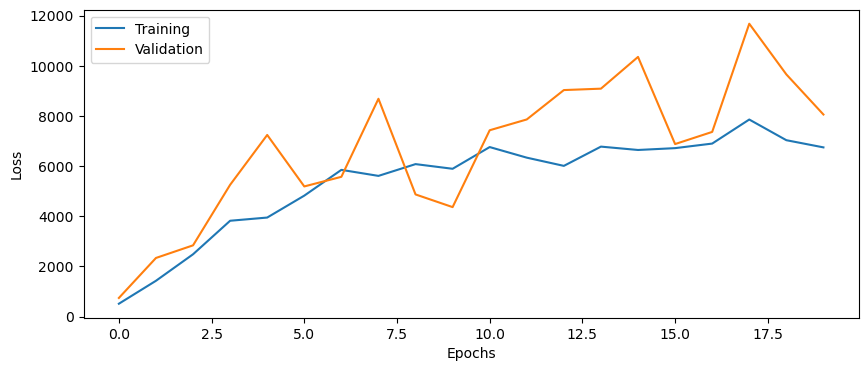

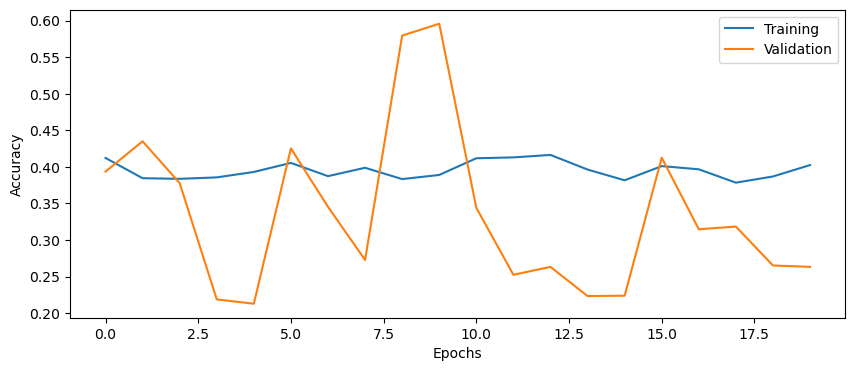

In [77]:
# Plot the history from the training run
plot_results(history11["history"]) 

As we have done for the MC dropout uncertainty estimation, run the evaluation on the test set 100 times and show the mean and standard deviation.

In [79]:
# ============================================
# === Your code here =========================
# ============================================
# Run the testing 100 times, and save the accuracies in an array

n_runs = 100

# Define where to save the test accuracies
test_accuracies = [None] * 100

for i in range(n_runs):
    # predict the test set
    pred = history11["history"].model.evaluate(Xtest, Ytest, verbose=0)

    # Save predictions
    test_accuracies[i] = pred[1]
    
# Calculate and print mean and std of accuracies
mean_test_accuracies = np.mean(test_accuracies)
std_test_accuracies = np.std(test_accuracies)

print(f"Mean of the test accuracies {mean_test_accuracies}")
print(f"Standard deviation of the test accuracies {std_test_accuracies}")
# ============================================




KeyboardInterrupt



In [80]:
model10.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 40)                3720      
                                                                 
 activation_30 (Activation)  (None, 40)                0         
                                                                 
 dense_46 (Dense)            (None, 40)                1640      
                                                                 
 activation_31 (Activation)  (None, 40)                0         
                                                                 
 dense_47 (Dense)            (None, 1)                 41        
                                                                 
Total params: 5401 (21.10 KB)
Trainable params: 5401 (21.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
model11.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_variational_4 (Dense  (None, 40)                6924780   
 Variational)                                                    
                                                                 
 activation_78 (Activation)  (None, 40)                0         
                                                                 
 dense_variational_5 (Dense  (None, 40)                1347260   
 Variational)                                                    
                                                                 
 activation_79 (Activation)  (None, 40)                0         
                                                                 
 dense_113 (Dense)           (None, 1)                 41        
                                                                 
Total params: 8272081 (31.56 MB)
Trainable params: 82

# Part 5: DNN for regression

A similar DNN can be used for regression, instead of classification.

#### **<span style="color:red">Questions</span>**
23. How would you change the DNN used in this lab in order to use it for regression instead?

#### **<span style="color:green">Answer</span>**

We would have to change the activation function of the output layer to linear. Also, the loss function should be the MSE.

## Report

Send in this jupyter notebook, with answers to all questions.